In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import drive
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/BBDD/Dataset_core.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Transformación de Datos
# Crea nuevas columnas:
 Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.


In [ ]:
df["Grupo Etario"] = df["Age"].apply(
    lambda x: "Joven" if x < 25 else "Adulto" if x < 60 else "Mayor"
)
'''
Se crea una columna para clasificar por edad de joven , adulto y mayor
'''
df["Grupo Etario"]

,Grupo Etario
0,Adulto
1,Adulto
2,Adulto
3,Adulto
4,Adulto
...,...
995,Mayor
996,Adulto
997,Joven
998,Adulto


# Clasifica los datos:
 Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [ ]:
'''
Se crea una columna para clasificar por gasto en bajo . media y alto
'''
df["Nivel de Gasto"] = df["Total Amount"].apply(
    lambda x: "Bajo" if x < 100 else "Medio" if x < 500 else "Alto"
)
df["Nivel de Gasto"]

,Nivel de Gasto
0,Medio
1,Alto
2,Bajo
3,Alto
4,Medio
...,...
995,Bajo
996,Bajo
997,Medio
998,Medio


# Agrupación por múltiples columnas:
 Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.


In [ ]:
agrup_categoria = df.groupby('Product Category')
'''
Podemos ver que Clothing y Electronics con lso productos mas vendido
'''
agrup_categoria["Quantity"].sum()


,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


# Aplicar funciones de agregación:
 Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [ ]:
'''
Se agrupa hombre y mujer para ver su gastos total
'''
df.groupby("Gender")["Total Amount"].agg(
    suma="sum",
    promedio="mean",
    cantidad="count",
    minimo="min",
    maximo="max",
    desviacion="std",
    varianza="var"
)



,suma,promedio,cantidad,minimo,maximo,desviacion,varianza
Gender,,,,,,,
Female,232840,456.549020,510,25,2000,554.299371,307247.792288
Male,223160,455.428571,490,25,2000,566.433809,320847.259714


# Función personalizada:
Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
# Ejemplo de uso avanzado:
 Calcula la desviación de cada venta respecto a la media de su grupo.

In [ ]:
df["Desviación vs Media Grupo"] = df["Total Amount"] - df.groupby("Gender")["Total Amount"].transform("mean").round()

'''
Se crea la columna registrando la desviacion de
'''
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Grupo Etario,Nivel de Gasto,Desviación vs Media Grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adulto,Medio,-305.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Adulto,Alto,543.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Adulto,Bajo,-425.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adulto,Alto,45.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adulto,Medio,-355.0


# Comentarios claros:
Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
# Código legible:
 Asegúrate de que el código sea legible y esté bien comentado.

# Continuacion de core Visualización para ciencia de datos / Proyecto I- Parte IV (Core)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction ID             1000 non-null   int64  
 1   Date                       1000 non-null   object 
 2   Customer ID                1000 non-null   object 
 3   Gender                     1000 non-null   object 
 4   Age                        1000 non-null   int64  
 5   Product Category           1000 non-null   object 
 6   Quantity                   1000 non-null   int64  
 7   Price per Unit             1000 non-null   int64  
 8   Total Amount               1000 non-null   int64  
 9   Grupo Etario               1000 non-null   object 
 10  Nivel de Gasto             1000 non-null   object 
 11  Desviación vs Media Grupo  1000 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [ ]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Grupo Etario,Nivel de Gasto,Desviación vs Media Grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adulto,Medio,-305.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Adulto,Alto,543.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Adulto,Bajo,-425.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adulto,Alto,45.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adulto,Medio,-355.0
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,Adulto,Bajo,-427.0
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,Adulto,Bajo,-405.0
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,Adulto,Medio,-355.0
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,Mayor,Alto,145.0
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,Adulto,Medio,-257.0


In [ ]:
# Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0
Desviación vs Media Grupo,1000.0,-0.020,559.997524,-432.0,-395.00,-321.0,443.00,1545.0


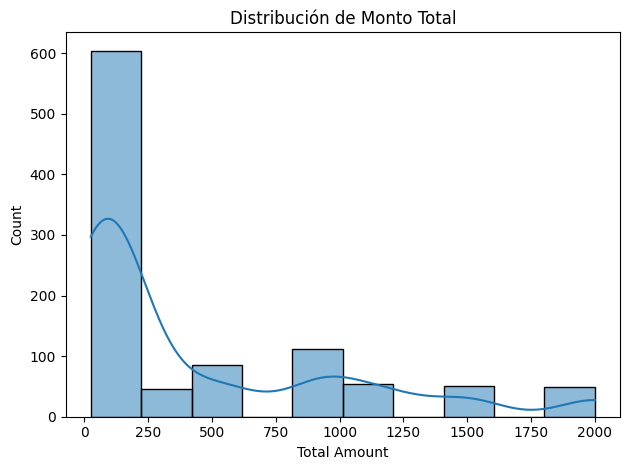

In [138]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

sns.histplot(data=df, x="Total Amount", bins=10, kde=True)
plt.title("Distribución de Monto Total")
plt.tight_layout()
plt.show()

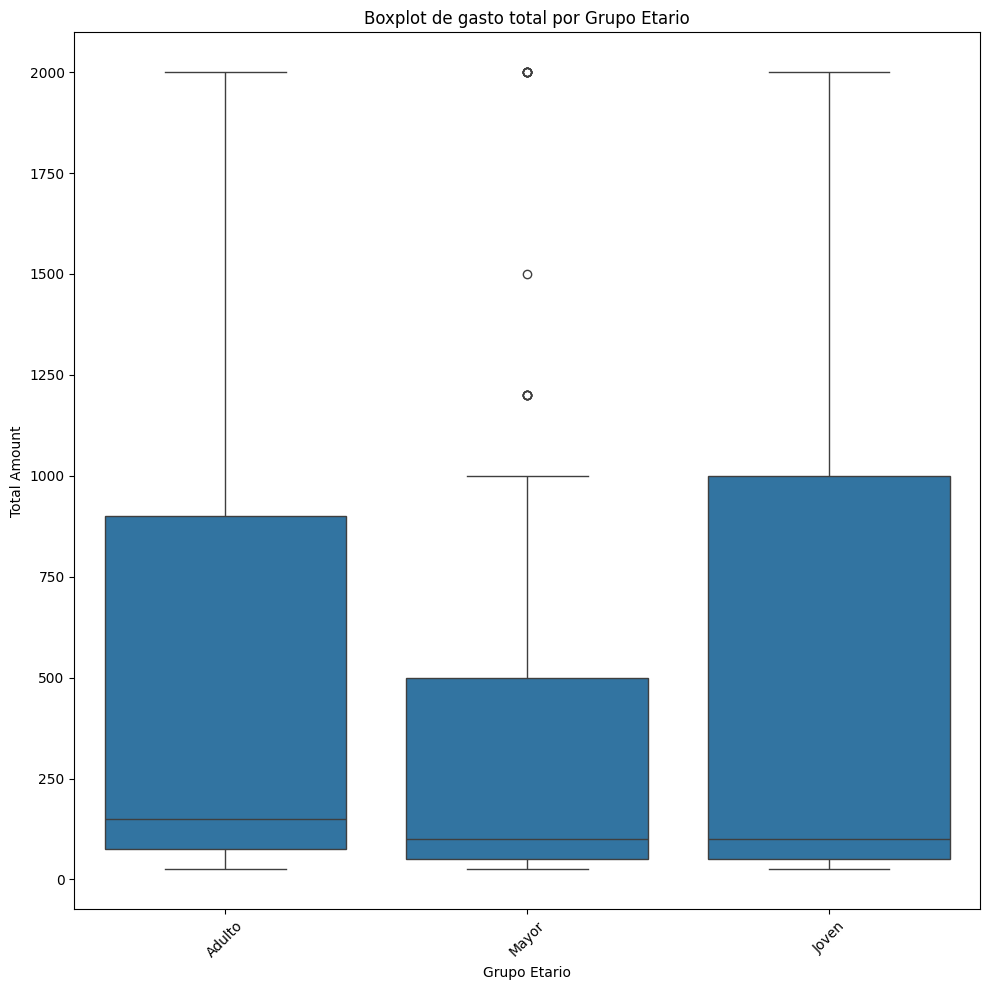

In [137]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="Grupo Etario", y="Total Amount")
plt.title("Boxplot de gasto total por Grupo Etario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# pasa el data de objet a datatime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

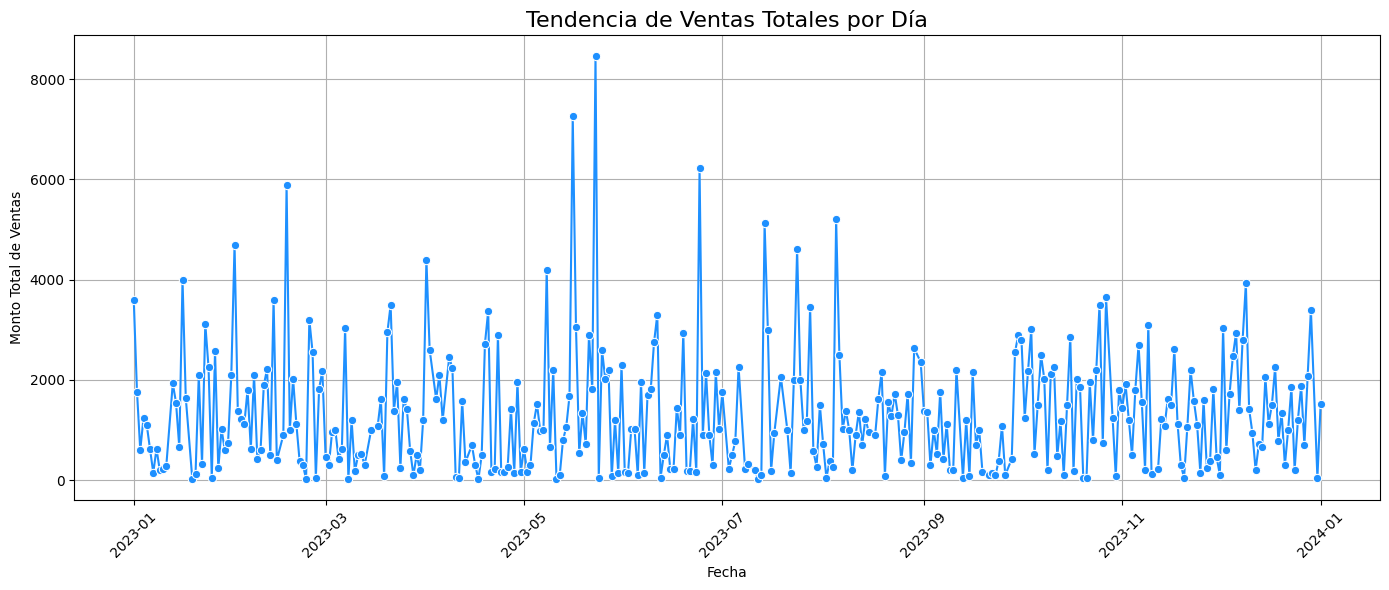

In [136]:
# Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

ventas_diarias = df.groupby('Date')['Total Amount'].sum().reset_index()

# Graficar línea de ventas totales
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_diarias, x='Date', y='Total Amount', marker='o', color='dodgerblue')
plt.title('Tendencia de Ventas Totales por Día', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

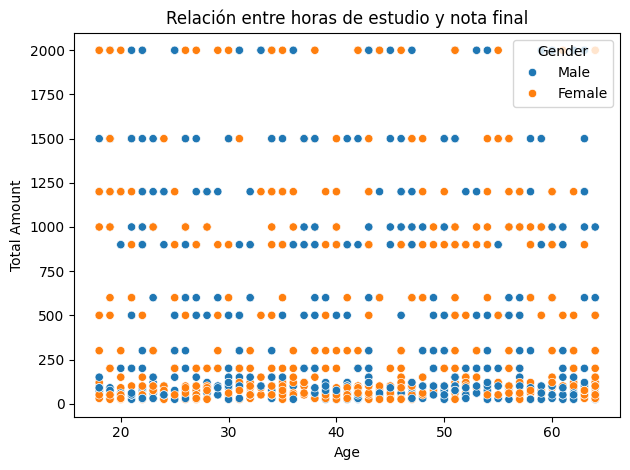

In [ ]:
# Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

sns.scatterplot(data=df, x="Age", y="Total Amount", hue="Gender")
plt.title("Relación entre años y gasto total por genero")
plt.tight_layout()
plt.show()

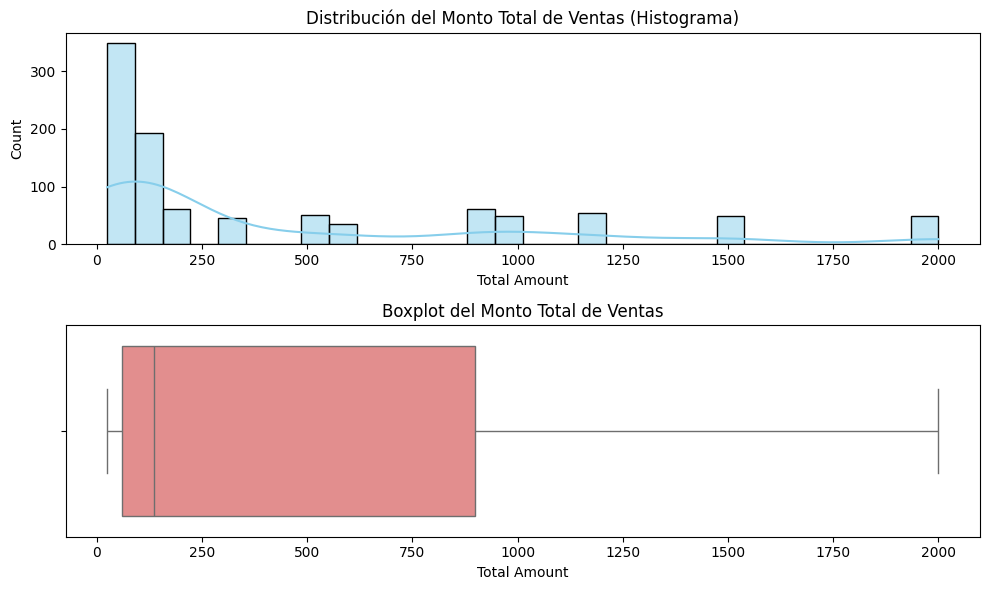

In [139]:
# Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.


# Figura con subplots
plt.figure(figsize=(10, 6))

# Subplot 1: Histograma
plt.subplot(2, 1, 1)
sns.histplot(df['Total Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Monto Total de Ventas (Histograma)')

# Subplot 2: Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['Total Amount'], color='lightcoral')
plt.title('Boxplot del Monto Total de Ventas')
plt.tight_layout()

plt.show()

# Continuar desde la Parte IV

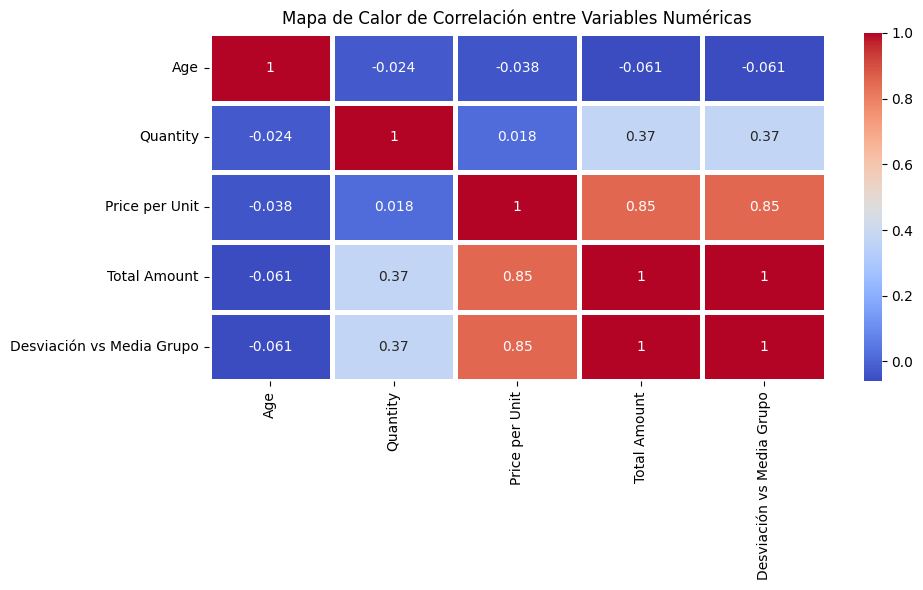

In [ ]:
# filtro de columna para correlacion
df_numericas = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Desviación vs Media Grupo']]

# Calcular matriz de correlación
matriz_corr = df_numericas.corr()

# Visualización con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=2.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

/tmp/ipython-input-135-725781570.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_group, x='Grupo Etario', y='Total Amount', ax=axes[1], palette='Set3')


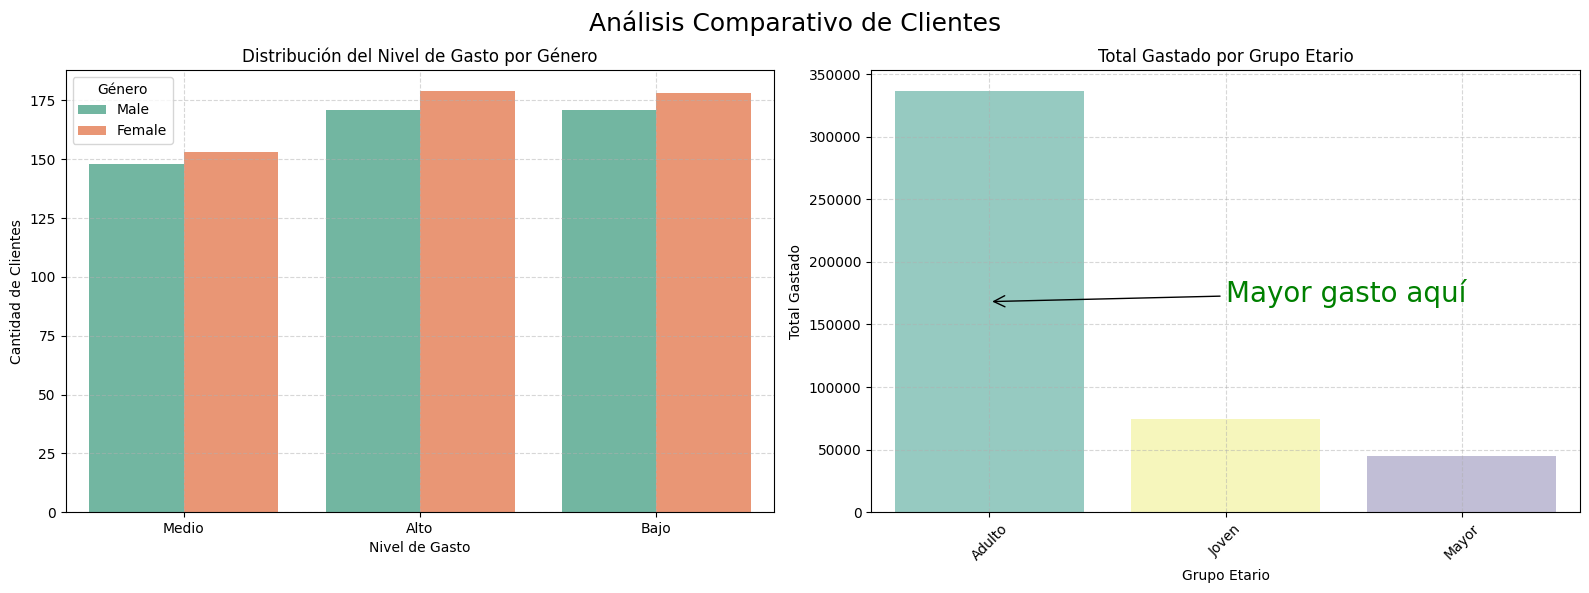

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
import os
from google.colab import files

folder = 'graficos'
if not os.path.exists(folder):
    os.makedirs(folder)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 🔹 1. Comparación de Nivel de Gasto por Género
sns.countplot(data=df, x='Nivel de Gasto', hue='Gender', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución del Nivel de Gasto por Género')
axes[0].set_xlabel('Nivel de Gasto')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].legend(title='Género')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 🔹 2. Total Gastado por Grupo Etario
df_age_group = df.groupby('Grupo Etario')['Total Amount'].sum().reset_index()
sns.barplot(data=df_age_group, x='Grupo Etario', y='Total Amount', ax=axes[1], palette='Set3')
axes[1].set_title('Total Gastado por Grupo Etario')
axes[1].set_xlabel('Grupo Etario')
axes[1].set_ylabel('Total Gastado')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)
grupo_top = df_age_group.iloc[0]
axes[1].annotate(
    'Mayor gasto aquí ',
    xy=(0, (grupo_top['Total Amount']/2)),
    xytext=(1, (grupo_top['Total Amount'] + 100) / 2),
    textcoords='data',
    arrowprops=dict(facecolor='green', arrowstyle='->'),
    fontsize=20,
    color='green',
)

# Ajustes
plt.suptitle('Análisis Comparativo de Clientes', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Guarda la figura usando fig (no plt)
save_path = os.path.join(folder, 'analisis_comparativo_clientes.png')
fig.savefig(save_path, dpi=300, bbox_inches='tight')

# Muestra la figura en Colab
plt.show()

# Descargar el archivo
files.download(save_path)


# Distribución del Nivel de Gasto por Género
-Las mujeres tienen mas gastos que los hombres y los dos generos  tienen gastos igualitarios entre alto y bajos

# Total Gastado por Grupo Etario
- Los adultos tiene el mayos gastos entre juvenes y mayor